In [1]:
from keras_retinanet.utils.image import preprocess_image
from keras_retinanet.utils.image import read_image_bgr
from keras_retinanet.utils.image import resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#import config
from keras_retinanet import models
from imutils import paths
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image  
import PIL  
import matplotlib.image as mpimg
from matplotlib.backends.backend_pdf import PdfPages
import os
import argparse
from fpdf import FPDF

%matplotlib inline

In [2]:
basedir = '/home/user1/rohit/UAVDT'
train_images_dir = os.path.join(basedir, 'UAV-benchmark-M')
train_annotation_dir = os.path.join(basedir, 'UAV-benchmark-MOTD_v1.0/GT')
relative_images_dir = './UAV-benchmark-M'
class_mapping = './class-mapping.csv'
train_annotations = './sorted_train_ann.csv'
test_annotations = os.path.join(basedir, 'sorted_test_ann.csv')

In [3]:
sequences = sorted(os.listdir(train_images_dir))
print(sequences)

['M0101', 'M0201', 'M0202', 'M0203', 'M0204', 'M0205', 'M0206', 'M0207', 'M0208', 'M0209', 'M0210', 'M0301', 'M0401', 'M0402', 'M0403', 'M0501', 'M0601', 'M0602', 'M0603', 'M0604', 'M0605', 'M0606', 'M0701', 'M0702', 'M0703', 'M0704', 'M0801', 'M0802', 'M0901', 'M0902', 'M1001', 'M1002', 'M1003', 'M1004', 'M1005', 'M1006', 'M1007', 'M1008', 'M1009', 'M1101', 'M1102', 'M1201', 'M1202', 'M1301', 'M1302', 'M1303', 'M1304', 'M1305', 'M1306', 'M1401']


In [4]:
test_seq = ['M0203','M0205','M0208','M0209','M0403','M0601','M0602','M0606','M0701','M0801','M0802','M1001','M1004','M1007','M1009','M1101','M1301','M1302','M1303','M1401']
print(f'Number of test sequences : {len(test_seq)}')

Number of test sequences : 20


In [5]:
train_seq = list(set(sequences) - set(test_seq))
print(f'Number of train sequences : {len(train_seq)}')

Number of train sequences : 30


In [6]:
num_train_imgs = 0
for seq in train_seq:
    num_train_imgs += len(os.listdir(os.path.join(relative_images_dir, seq)))
print(f'Number of train images : {num_train_imgs}')

Number of train images : 24143


In [7]:
num_test_imgs = 0
for seq in test_seq:
    num_test_imgs += len(os.listdir(os.path.join(relative_images_dir, seq)))
print(f'Number of train images : {num_test_imgs}')

Number of train images : 16592


In [8]:
LABELS = open(class_mapping).read().strip().split('\n')
LABELS = {L.split(",")[0]: int(L.split(",")[1]) for L in LABELS}
print(LABELS)

{'car': 0, 'truck': 1, 'bus': 2}


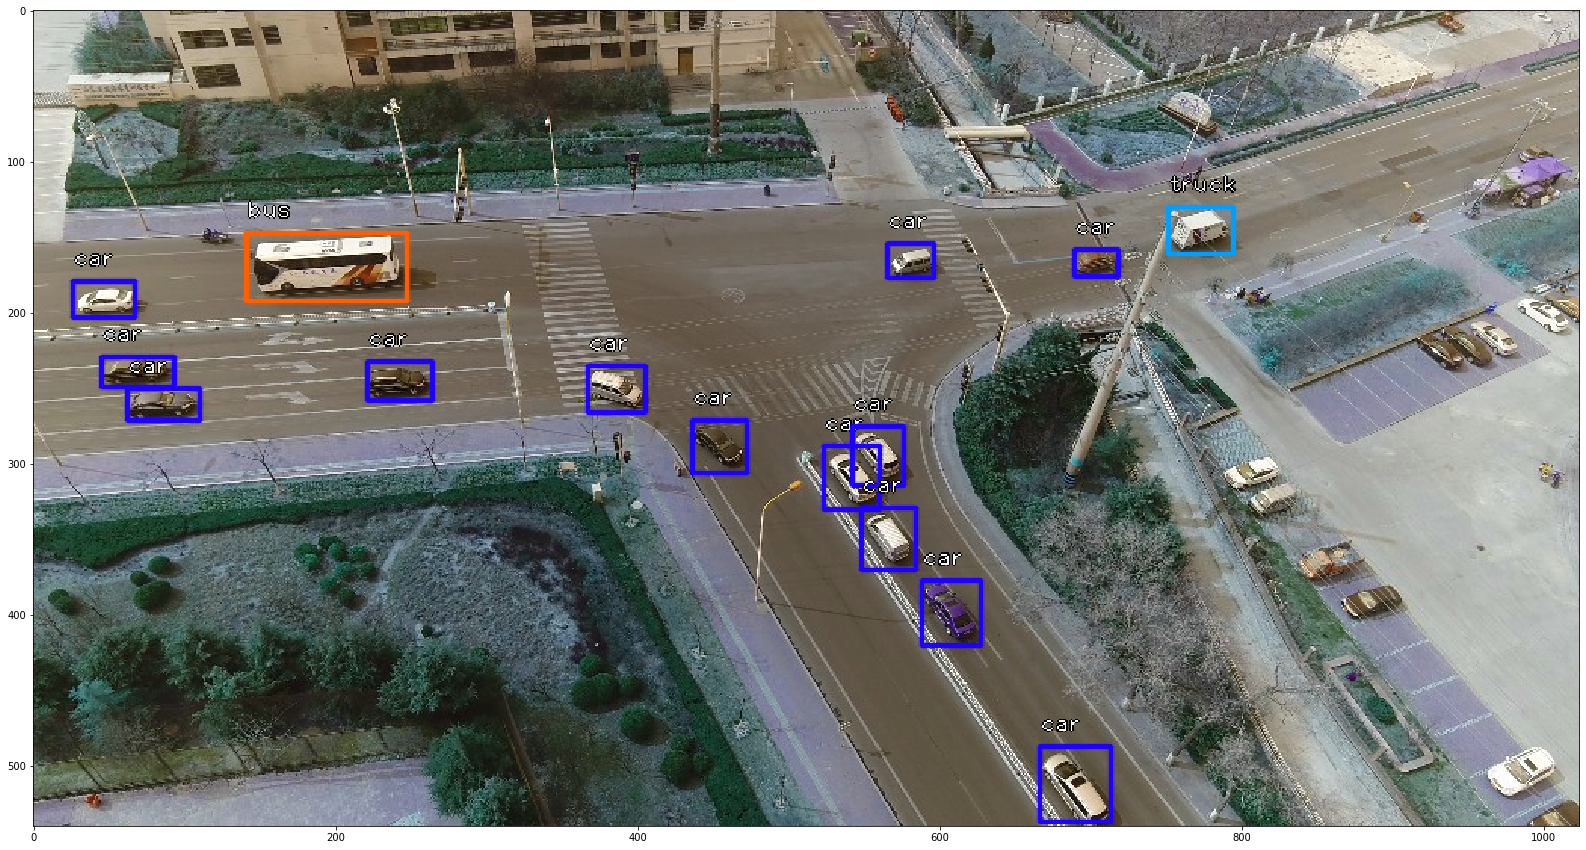

In [9]:
plt.figure(figsize=(30,15))
ann = open(train_annotations, "r")
lines = ann.readlines()
for i in range(len(lines)):
    box=lines[i].strip().split(',')
    img = cv2.imread(box[0])
    while(lines[i].strip().split(',')[0] == box[0]):
        next_box = lines[i].strip().split(',')
        draw_box(img, next_box[1:5], label_color(LABELS[next_box[-1]]))
        draw_caption(img, np.array(next_box[1:5], dtype='int32'), next_box[-1])
        i+=1
    plt.imshow(img)
    break
    
#print("done")
ann.close()

In [10]:
model = './snapshots/resnet50-inf-05.h5'
model = models.load_model(model, backbone_name='resnet50')

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/home/user1/.conda/envs/rohit_venv_2/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[INFO] predicting on image 1 of /home/user1/rohit/UAVDT/UAV-benchmark-M/M0203/img000081.jpg
filename is img000081
[INFO] predicting on image 2 of /home/user1/rohit/UAVDT/UAV-benchmark-M/M0203/img000815.jpg
filename is img000815
[INFO] predicting on image 3 of /home/user1/rohit/UAVDT/UAV-benchmark-M/M0203/img000598.jpg
filename is img000598


<Figure size 432x288 with 0 Axes>

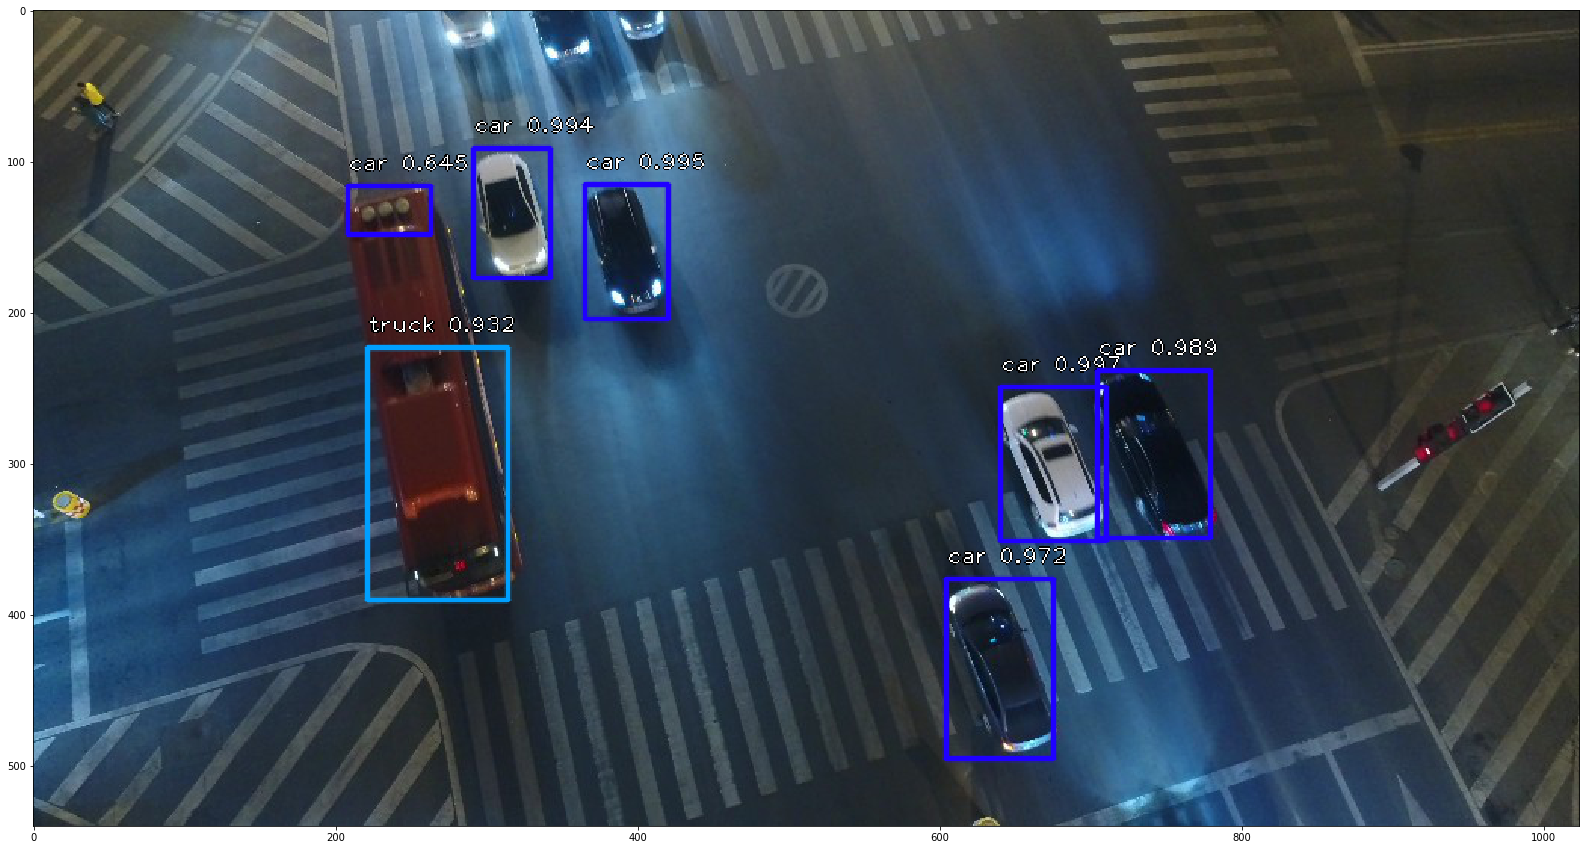

<Figure size 432x288 with 0 Axes>

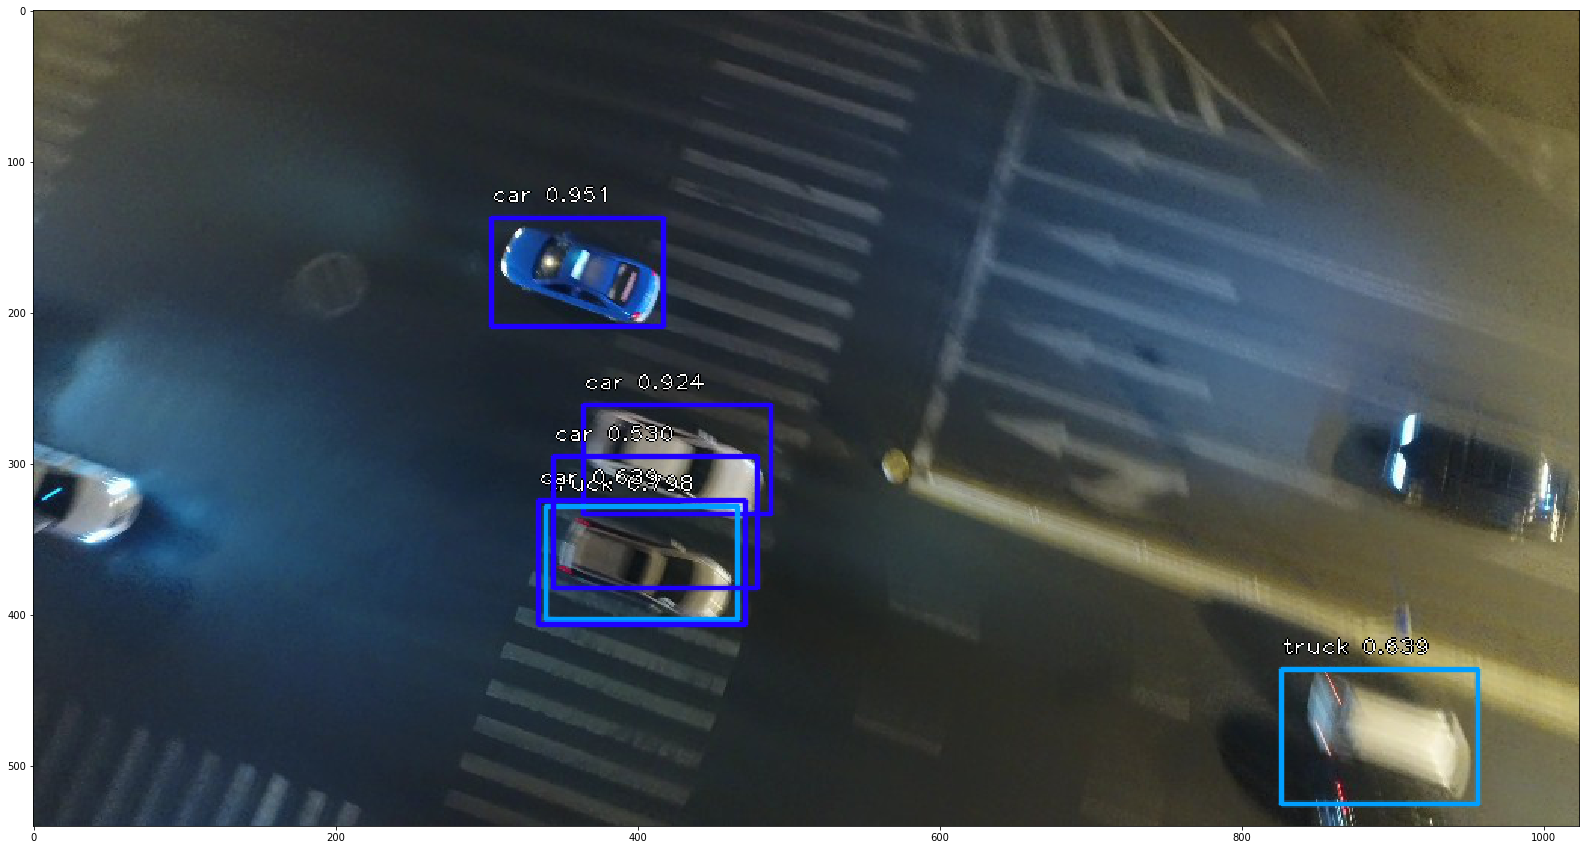

<Figure size 432x288 with 0 Axes>

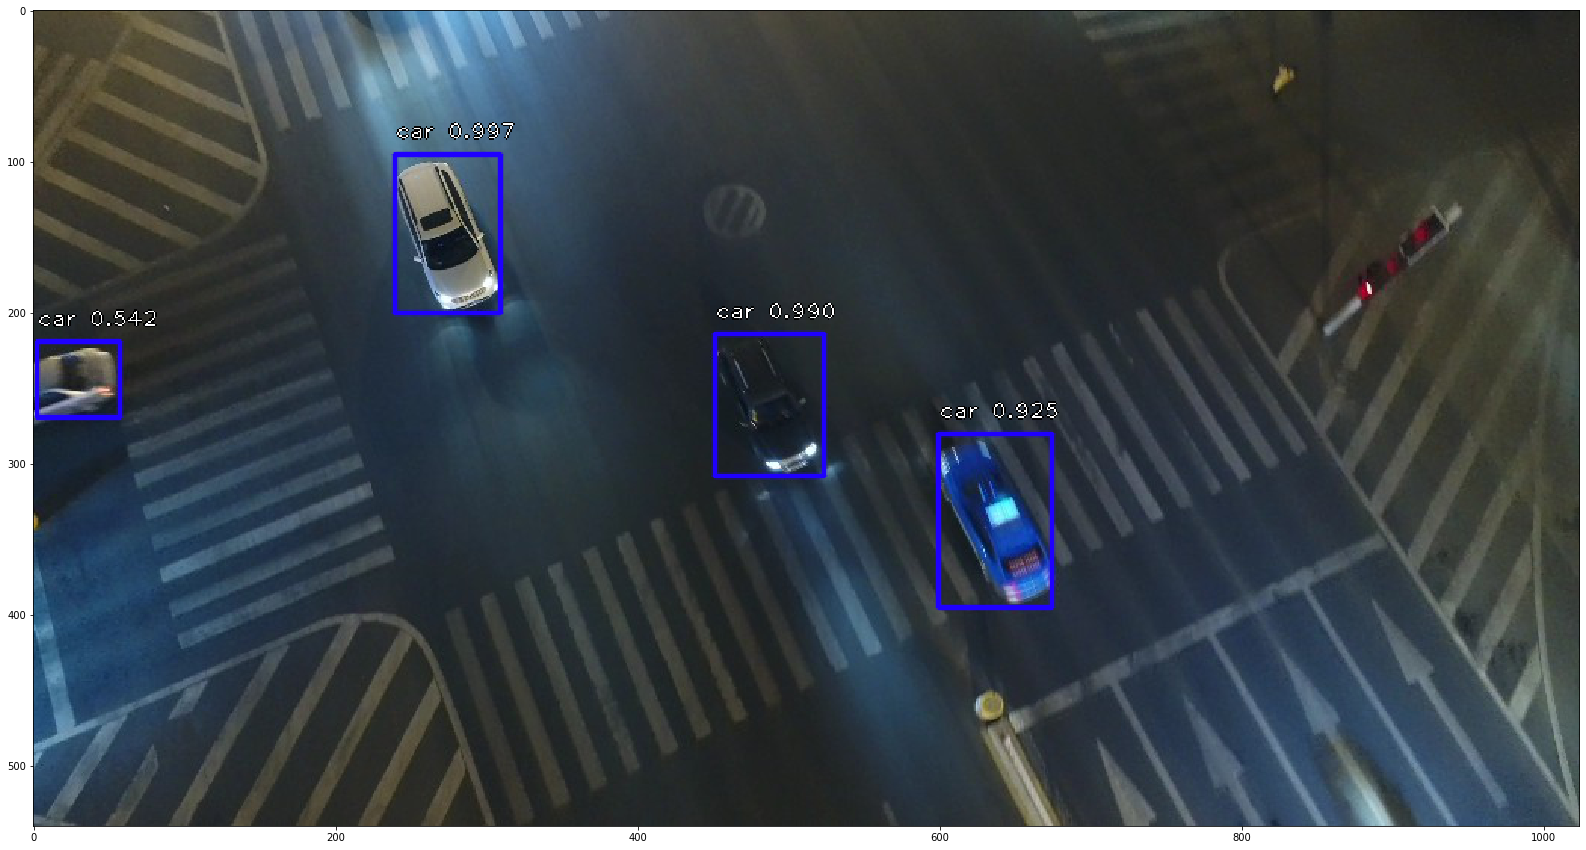

In [11]:
labels = './class-mapping.csv'
inputs = test_annotations
confidence = 0.5

LABELS = open(labels).read().strip().split('\n')
LABELS = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS}


for sequence in test_seq:
    img_dir = os.path.join(train_images_dir, sequence)
    inputs = img_dir
    imagePaths = list(paths.list_images(inputs))
    for (i, imagePath) in enumerate(imagePaths):
        plt.figure()
        plt.figure(figsize=(30,15))
        print("[INFO] predicting on image {} of {}".format(i+1, imagePath))
        filename = (imagePath.split(os.path.sep)[-1]).split('.')[0]
        print('filename is ' + filename)
        image = read_image_bgr(imagePath)

        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

        image = preprocess_image(image)
        (image, scale) = resize_image(image)

        image = np.expand_dims(image, axis=0)

        (boxes, scores, labels) = model.predict_on_batch(image)
        boxes /= scale

        for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

            if score < confidence:
                continue

            color = label_color(label)
            b = box.astype(int)
            draw_box(draw, b, color=color)

            caption = "{} {:.3f}".format(LABELS[label], score)
            draw_caption(draw, b, caption)
        draw = Image.fromarray(draw)
        plt.imshow(draw)
        if(i==2):
            break
    break

In [ ]:
# COMBINED GROUND TRUTH AND PREDICTED BOUNDING BOX GENERATOR

plt.figure(figsize=(30,15))
labels = './class-mapping.csv'
inputs = test_annotations
confidence = 0.5

ann = open(test_annotations, "r")
i=0
lines = ann.readlines()

LABELS_orig = open(class_mapping).read().strip().split('\n')
LABELS = {L.split(",")[0]: int(L.split(",")[1]) for L in LABELS_orig}
LABELS_REV = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS_orig}

count_imgs = 0

while i < len(lines):
    count_imgs +=1
    pdf = FPDF(orientation = 'L', unit = 'mm', format = (450, 700))
    pdf.compress = False
    pdf.add_page()

    box=lines[i].strip().split(',')
    img = cv2.imread(box[0])
    filename = (box[0].split(os.path.sep)[-1]).split('.')[0]
    while(lines[i].strip().split(',')[0] == box[0]):
        next_box = lines[i].strip().split(',')
        draw_box(img, next_box[1:5], label_color(LABELS[next_box[-1]]))
        draw_caption(img, np.array(next_box[1:5], dtype='int32'), next_box[-1])
        i+=1 
    
    draw = Image.fromarray(img)
    draw.save("UAVDT_RESULTS/ground_truth_images/{}.jpg".format(filename))

    print("[INFO] predicting on image {}".format(box[0]))
    
    image = read_image_bgr(box[0])
 
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    (image, scale) = resize_image(image)
        
    image = np.expand_dims(image, axis=0)

    (boxes, scores, labels) = model.predict_on_batch(image)
    boxes /= scale

    for (box, score, label) in zip(boxes[0], scores[0], labels[0]):

        if score < confidence:
            continue
        
        color = label_color(label)
        b = box.astype(int)
        draw_box(draw, b, color=color)
     
        caption = "{} {:.3f}".format(LABELS_REV[label], score)
        draw_caption(draw, b, caption)
    draw = Image.fromarray(draw)

    draw.save("UAVDT_RESULTS/predicted_images/{}.jpg".format(filename))
    
    pdf.image("UAVDT_RESULTS/ground_truth_images/{}.jpg".format(filename))
    pdf.add_page()
    pdf.image("UAVDT_RESULTS/predicted_images/{}.jpg".format(filename))
    pdf.output("./UAVDT_RESULTS/OUTPUT_PDF/{}.pdf".format(filename), "F") 
        
ann.close()

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000001.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000002.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000003.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000004.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000005.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000006.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000007.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000008.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000009.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000010.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000011.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000012.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000013.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000014.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000015.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000150.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000151.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000152.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000153.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000154.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000155.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000156.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000157.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000158.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000159.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000160.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000161.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000162.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000163.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000164.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000277.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000278.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000279.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000280.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000281.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000282.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000283.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000284.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000285.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000286.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000287.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000288.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000289.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000290.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000291.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000404.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000405.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000406.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000407.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000408.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000409.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000410.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000411.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000412.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000413.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000414.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000415.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000416.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000417.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000418.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000531.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000532.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000533.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000534.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000535.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000536.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000537.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000538.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000539.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000540.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000541.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000542.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000543.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000544.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000545.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000658.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000659.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000660.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000661.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000662.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000663.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000664.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000665.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000666.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000667.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000668.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000669.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000670.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000671.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000672.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000785.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000786.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000787.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000788.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000789.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000790.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000791.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000792.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000793.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000794.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000795.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000796.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000797.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000798.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000799.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0203/img000924.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000925.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000926.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000927.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000928.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000929.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000930.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000931.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000932.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000933.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000934.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000935.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000936.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000937.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0203/img000938.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0205/img000044.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000045.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000046.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000047.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000048.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000049.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000050.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000051.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000052.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000053.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000054.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000055.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000056.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000057.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000058.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0205/img000171.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000172.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000173.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000174.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000175.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000176.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000177.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000178.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000179.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000180.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000181.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000182.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000183.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000184.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000185.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0205/img000298.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000299.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000300.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000301.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000302.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000303.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000304.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000305.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000306.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000307.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000308.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000309.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000310.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000311.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000312.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0205/img000425.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000426.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000427.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000428.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000429.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000430.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000431.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000432.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000433.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000434.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000435.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000436.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000437.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000438.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000439.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0205/img000552.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000553.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000554.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000555.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000556.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000557.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000558.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000559.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000560.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000561.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000562.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000563.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000564.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000565.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0205/img000566.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0208/img000033.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000034.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000035.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000036.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000037.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000038.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000039.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000040.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000041.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000042.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000043.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000044.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000045.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000046.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000047.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0208/img000160.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000161.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000162.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000163.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000164.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000165.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000166.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000167.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000168.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000169.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000170.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000171.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000172.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000173.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0208/img000174.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0209/img000022.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000023.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000024.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000025.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000026.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000027.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000028.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000029.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000030.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000031.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000032.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000033.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000034.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000035.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000036.jpg
[INFO] predicting on imag

[INFO] predicting on image ./UAV-benchmark-M/M0209/img000149.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000150.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000151.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000152.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000153.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000154.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000155.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000156.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000157.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000158.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000159.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000160.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000161.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000162.jpg
[INFO] predicting on image ./UAV-benchmark-M/M0209/img000163.jpg
[INFO] predicting on imag